# Social ComQuant Summer School 2022 - Analysis

In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read Downloaded Tweets with Sentiment

In [2]:
with open("data/tweets_diff_kilicdar_wSentiment.json", "r") as f:
    kilicdaroglu_tweets = f.readlines()
for i in range(len(kilicdaroglu_tweets)):
    kilicdaroglu_tweets[i] = json.loads(kilicdaroglu_tweets[i])
    
with open("data/tweets_diff_imamoglu_wSentiment.json", "r") as f:
    imamoglu_tweets = f.readlines()
for i in range(len(imamoglu_tweets)):
    imamoglu_tweets[i] = json.loads(imamoglu_tweets[i])
    
with open("data/tweets_diff_mansur_yavas_wSentiment.json", "r") as f:
    mansur_tweets = f.readlines()
for i in range(len(mansur_tweets)):
    mansur_tweets[i] = json.loads(mansur_tweets[i])

In [3]:
kilicdaroglu_df = pd.DataFrame(kilicdaroglu_tweets)
imamoglu_df = pd.DataFrame(imamoglu_tweets)
mansur_df = pd.DataFrame(mansur_tweets)

kilicdaroglu_df["candidate"] = "kilicdaroglu"
imamoglu_df["candidate"] = "imamoglu"
mansur_df["candidate"] = "mansur"

## Distribution of Sentiments for Each Candidate

In [4]:
tweet_distribution = pd.concat([pd.DataFrame(kilicdaroglu_df["sentiment"].apply(lambda x: x[0]["label"]).value_counts()), pd.DataFrame(imamoglu_df["sentiment"].apply(lambda x: x[0]["label"]).value_counts()), pd.DataFrame(mansur_df["sentiment"].apply(lambda x: x[0]["label"]).value_counts())], axis=1).T
tweet_distribution.index = ["Kemal Kılıçdaroğlu", "Ekrem İmamoğlu", "Mansur Yavaş"]
tweet_distribution = tweet_distribution.reset_index().rename({"index": "candidate"}, axis=1)

In [5]:
tweet_distribution

candidate  negative  positive
0  Kemal Kılıçdaroğlu     55819     25725
1      Ekrem İmamoğlu     28856      7335
2        Mansur Yavaş     49241      5998

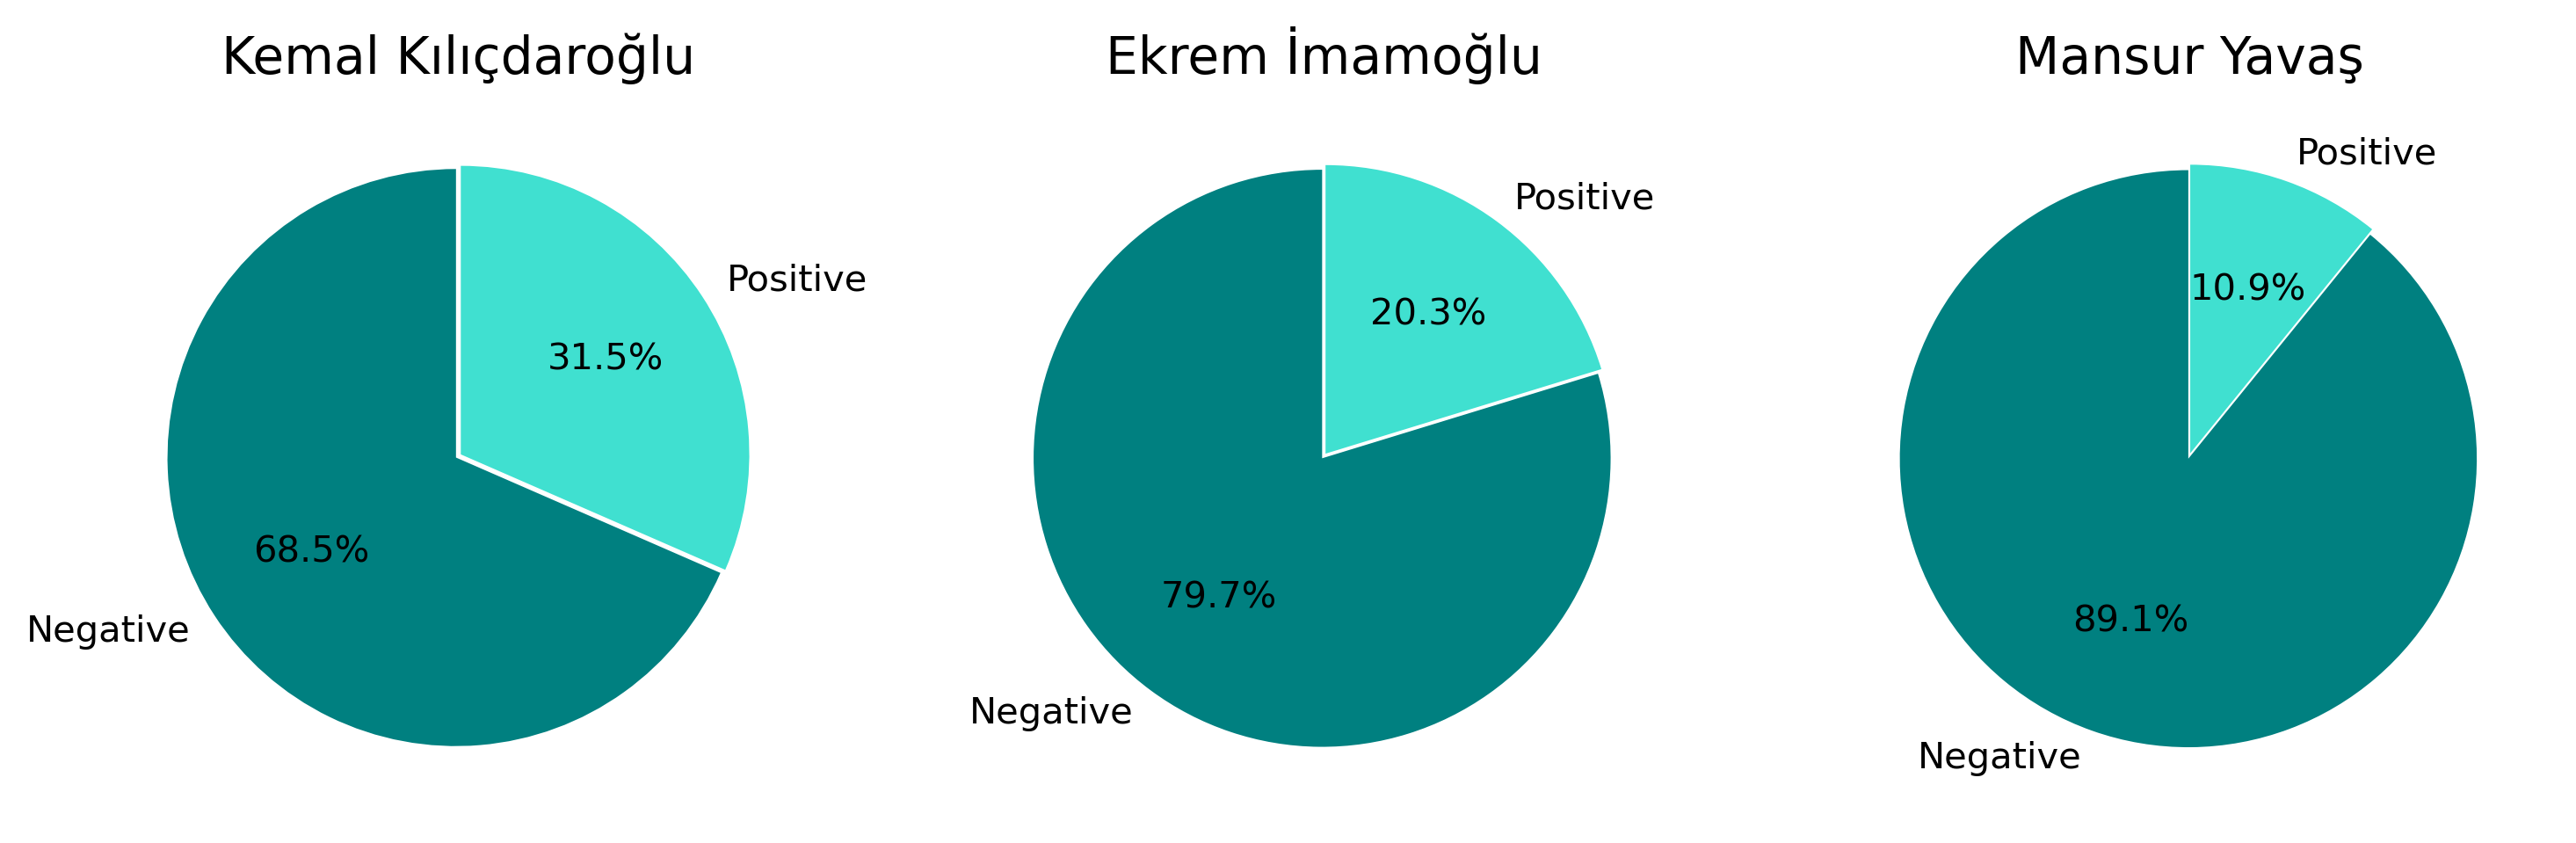

In [6]:
plt.figure(figsize=(12, 8), dpi=300)

plt.subplot(1, 3, 1)
plt.pie(list(tweet_distribution.iloc[0, 1:]), explode=[0.01, 0.01], labels=["Negative", "Positive"],
        autopct='%1.1f%%', startangle=90, colors=["teal", "turquoise"], textprops={"fontsize":10})
plt.title("Kemal Kılıçdaroğlu", fontsize=14)

plt.subplot(1, 3, 2)
plt.pie(list(tweet_distribution.iloc[1, 1:]), explode=[0.01, 0.01], labels=["Negative", "Positive"],
        autopct='%1.1f%%', startangle=90, colors=["teal", "turquoise"], textprops={"fontsize":10})
plt.title("Ekrem İmamoğlu", fontsize=14)

plt.subplot(1, 3, 3)
plt.pie(list(tweet_distribution.iloc[2, 1:]), explode=[0.01, 0.01], labels=["Negative", "Positive"],
        autopct='%1.1f%%', startangle=90, colors=["teal", "turquoise"], textprops={"fontsize":10})
plt.title("Mansur Yavaş", fontsize=14)


plt.show()

In [7]:
df = pd.concat([kilicdaroglu_df, imamoglu_df, mansur_df]).reset_index(drop=True)

In [8]:
df["sentiment_score"] = df["sentiment"].apply(lambda x: -x[0]["score"] if x[0]["label"] == "negative" else x[0]["score"])

In [9]:
df["created_at"] = pd.to_datetime(df["created_at"].apply(lambda x: ' '.join(x.split("T"))[:-1]))

In [10]:
df["created_at_date"] = df["created_at"].dt.date
df["created_at_year"] = df["created_at"].dt.year
df["created_at_month"] = df["created_at"].dt.month
df["created_at_day"] = df["created_at"].dt.day

daily_dates = [str(date) for date in sorted(df["created_at_date"].unique())]

## Tweet Counts

In [11]:
candidates_tweet_count = pd.concat([pd.Series(["Kemal Kılıçdaroğlu", "Ekrem İmamoğlu", "Mansur Yavaş"], name="candidate"), pd.Series([df[df["candidate"] == "kilicdaroglu"].shape[0], df[df["candidate"] == "imamoglu"].shape[0], df[df["candidate"] == "mansur"].shape[0]], name="total_tweet_count")], axis=1)
candidates_tweet_count["percentage"] = (candidates_tweet_count["total_tweet_count"] / candidates_tweet_count["total_tweet_count"].sum()).apply(lambda x: str(x*100)[:5] + "%")
candidates_tweet_count

candidate  total_tweet_count percentage
0  Kemal Kılıçdaroğlu              81544     47.14%
1      Ekrem İmamoğlu              36191     20.92%
2        Mansur Yavaş              55239     31.93%

In [12]:
tweet_counts = pd.DataFrame(df.groupby(["candidate", "created_at_date"])["created_at_date"].count()).rename({"created_at_date":"tweet_count"}, axis=1).reset_index()

In [13]:
pd.DataFrame(tweet_counts.groupby(["candidate"])["tweet_count"].sum()).reset_index()

candidate  tweet_count
0      imamoglu        36191
1  kilicdaroglu        81544
2        mansur        55239

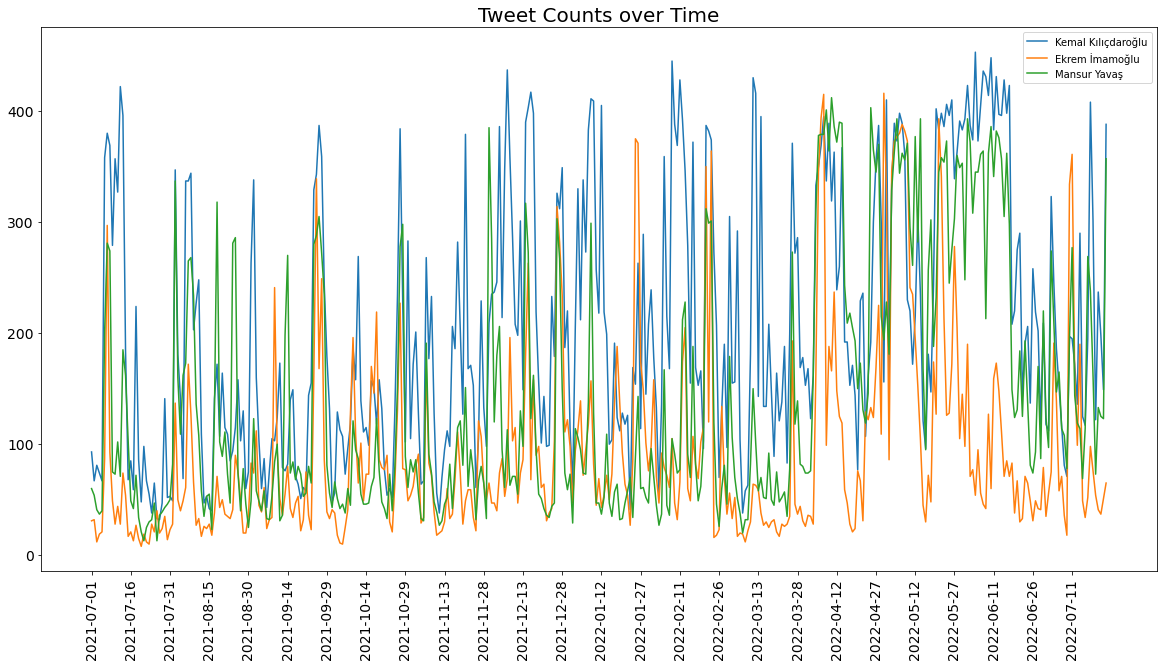

In [14]:
plt.figure(figsize=(20, 10))

plt.plot(tweet_counts[tweet_counts["candidate"] == "kilicdaroglu"]["created_at_date"], tweet_counts[tweet_counts["candidate"] == "kilicdaroglu"]["tweet_count"], label="Kemal Kılıçdaroğlu")
plt.plot(tweet_counts[tweet_counts["candidate"] == "imamoglu"]["created_at_date"], tweet_counts[tweet_counts["candidate"] == "imamoglu"]["tweet_count"], label="Ekrem İmamoğlu")
plt.plot(tweet_counts[tweet_counts["candidate"] == "mansur"]["created_at_date"], tweet_counts[tweet_counts["candidate"] == "mansur"]["tweet_count"], label="Mansur Yavaş")

plt.title("Tweet Counts over Time", fontsize=20)
plt.xticks(daily_dates[::15], rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.legend()
plt.show()

## Sentiment Scores

In [15]:
candidate_sent_scores_daily = pd.DataFrame(df.groupby(["candidate", "created_at_date"])["sentiment_score"].mean()).reset_index()
candidate_sent_scores_daily = candidate_sent_scores_daily.rename({"created_at_date":"date"}, axis=1).set_index("date")

candidate_sent_scores_monthly = pd.DataFrame(df.groupby(["candidate", "created_at_year", "created_at_month"])["sentiment_score"].mean()).reset_index()
candidate_sent_scores_monthly["date"] = candidate_sent_scores_monthly["created_at_year"].astype(str) + "-" + candidate_sent_scores_monthly["created_at_month"].astype(str)
candidate_sent_scores_monthly = candidate_sent_scores_monthly.drop(["created_at_year", "created_at_month"], axis=1).set_index("date")

In [16]:
kilicdaroglu_sent_monthly = candidate_sent_scores_monthly[candidate_sent_scores_monthly["candidate"] == "kilicdaroglu"]
imamoglu_sent_monthly = candidate_sent_scores_monthly[candidate_sent_scores_monthly["candidate"] == "imamoglu"]
mansur_sent_monthly = candidate_sent_scores_monthly[candidate_sent_scores_monthly["candidate"] == "mansur"]

In [17]:
kilicdaroglu_sent_daily = candidate_sent_scores_daily[candidate_sent_scores_daily["candidate"] == "kilicdaroglu"]
imamoglu_sent_daily = candidate_sent_scores_daily[candidate_sent_scores_daily["candidate"] == "imamoglu"]
mansur_sent_daily = candidate_sent_scores_daily[candidate_sent_scores_daily["candidate"] == "mansur"]

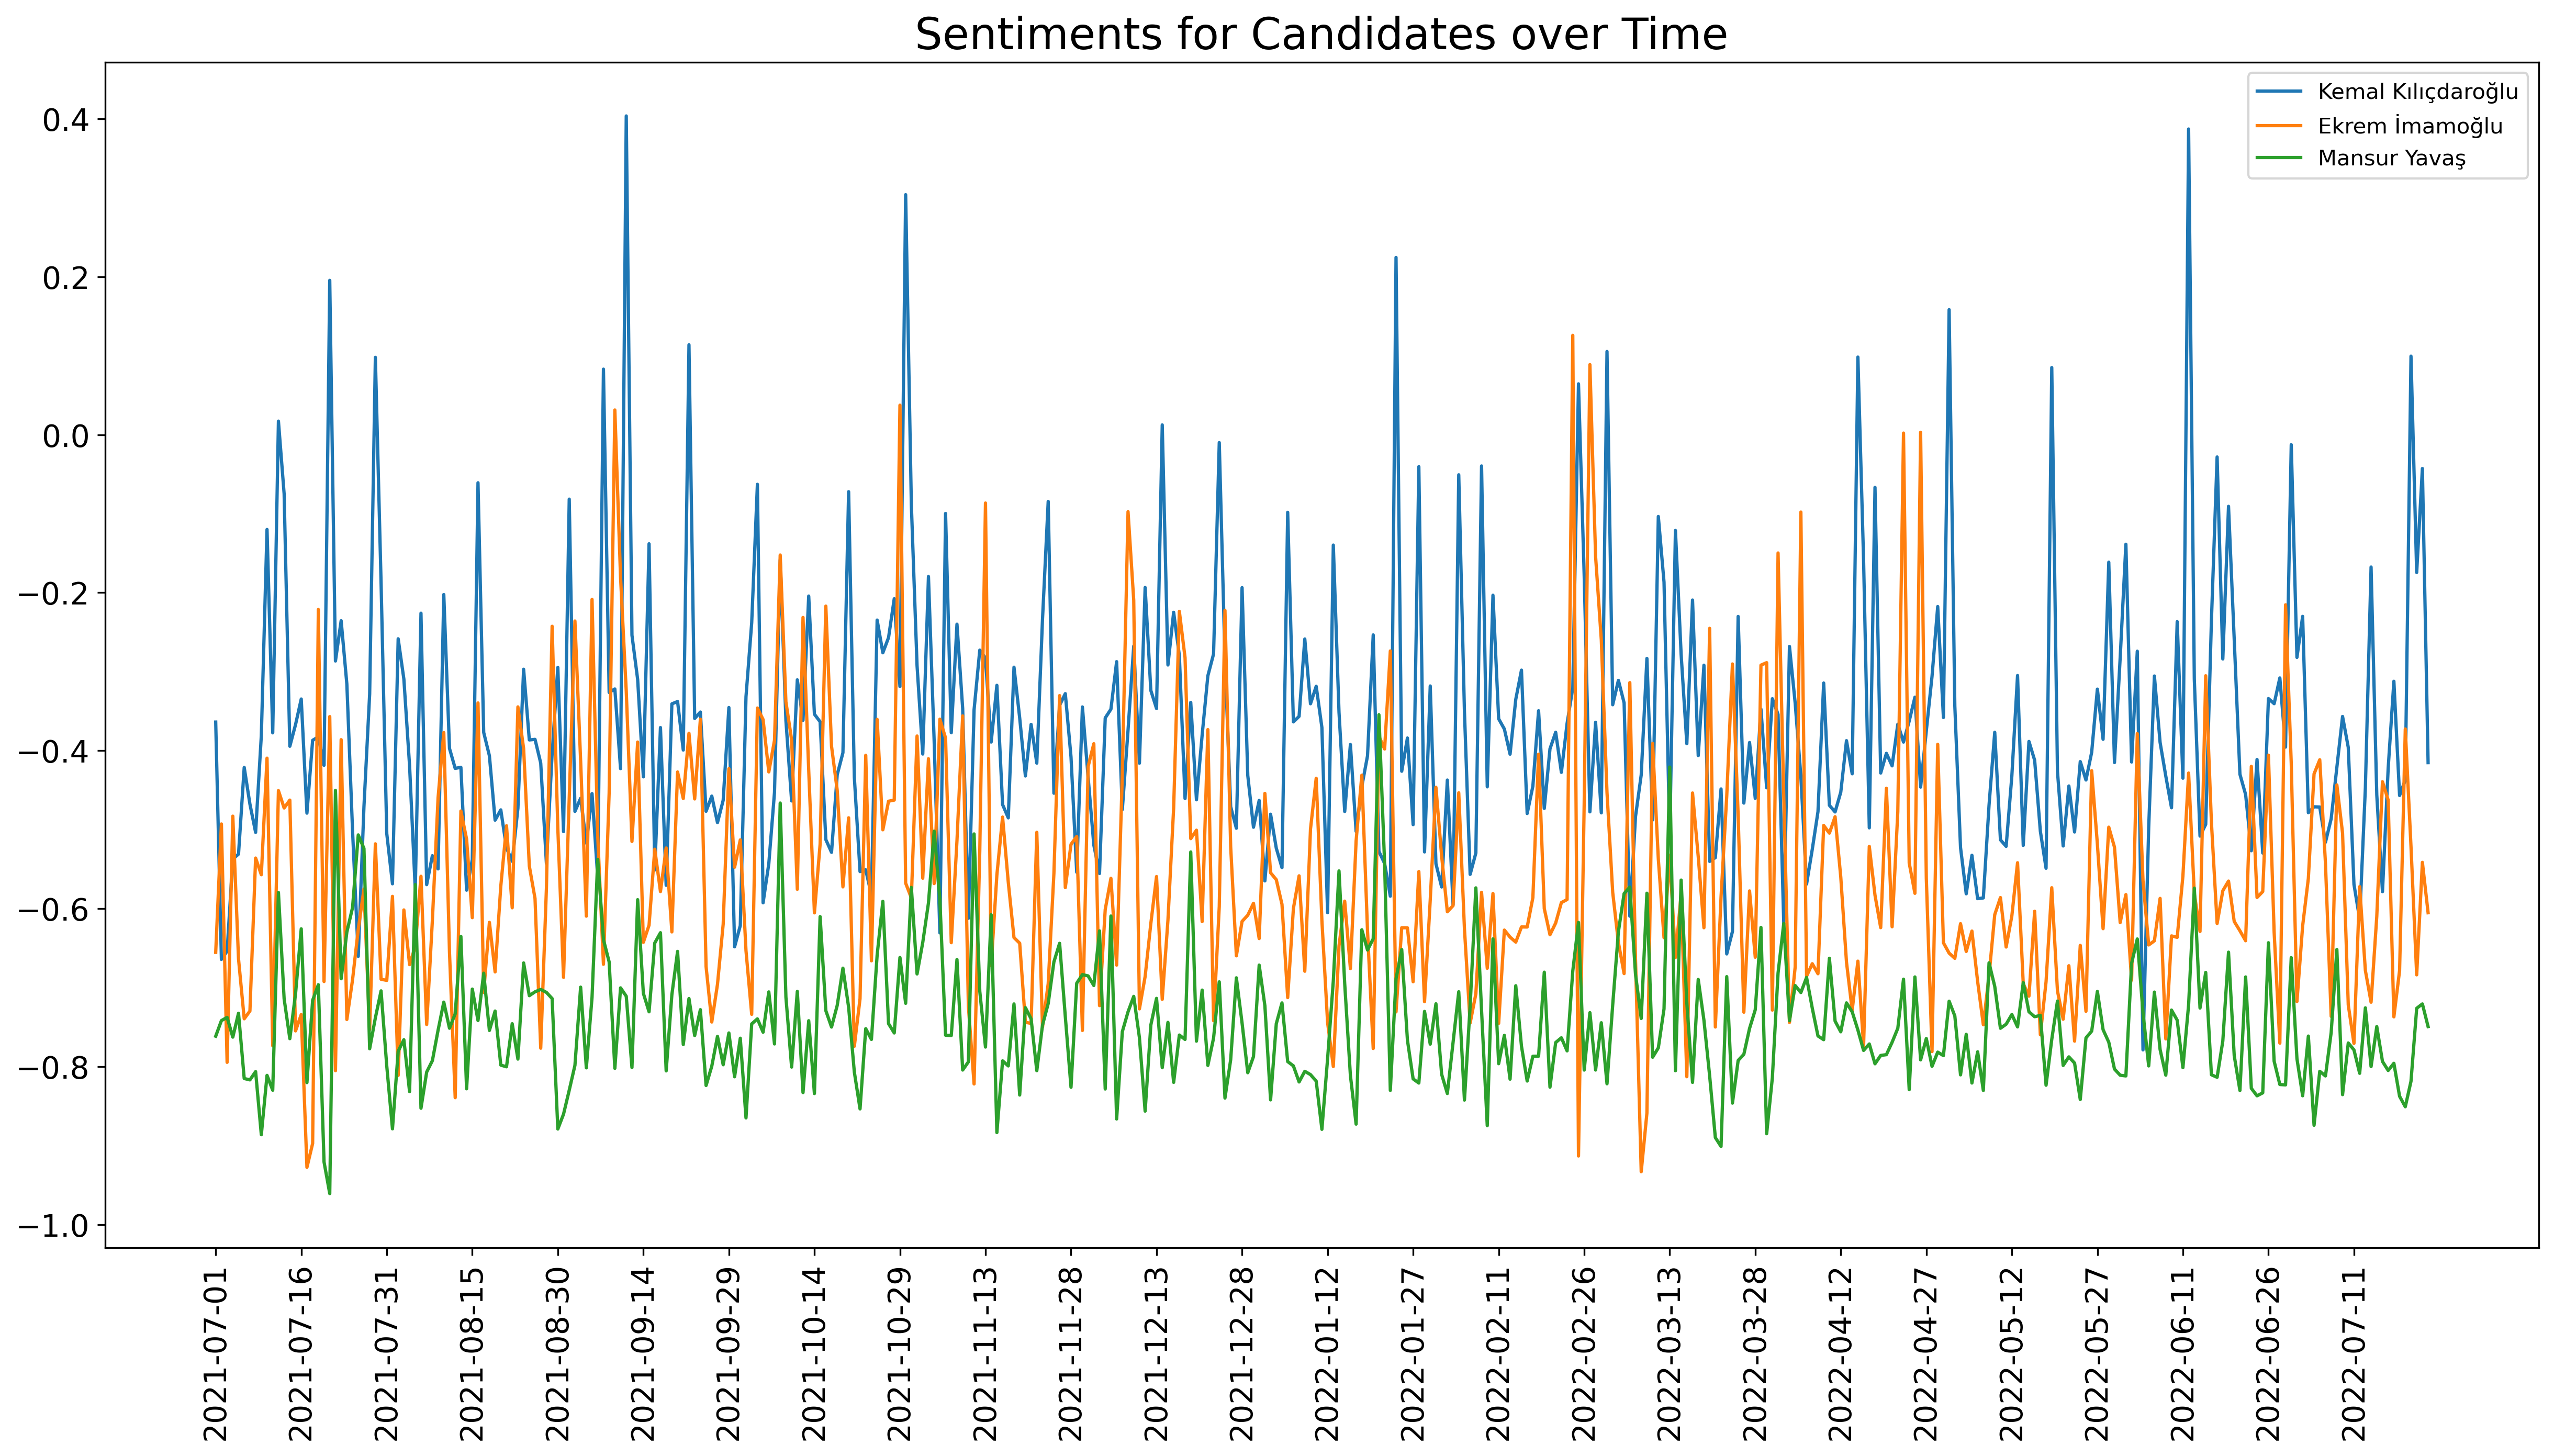

In [18]:
plt.figure(figsize=(20, 10), dpi=300)

plt.plot(kilicdaroglu_sent_daily.index, kilicdaroglu_sent_daily["sentiment_score"], label="Kemal Kılıçdaroğlu")
plt.plot(imamoglu_sent_daily.index, imamoglu_sent_daily["sentiment_score"], label="Ekrem İmamoğlu")
plt.plot(mansur_sent_daily.index, mansur_sent_daily["sentiment_score"], label="Mansur Yavaş")

plt.title("Sentiments for Candidates over Time", fontsize=20)
plt.xticks(kilicdaroglu_sent_daily.index[::15], rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.legend()
plt.show()

## Percentage Change in Sentiment Scores

In [19]:
def calculate_percentage_change(new_number, original_number):
    increase = original_number - new_number
    percentage_change = increase / original_number * 100
    return percentage_change

### Monthly

In [20]:
percentage_changes = []

for i in range(1, len(kilicdaroglu_sent_monthly)):
    percentage_changes.append(calculate_percentage_change(kilicdaroglu_sent_monthly.iloc[i, 1], kilicdaroglu_sent_monthly.iloc[i-1, 1]))
kilicdaroglu_sent_monthly = pd.concat([kilicdaroglu_sent_monthly, pd.Series([np.nan] + percentage_changes, name="percentage_change", index=kilicdaroglu_sent_monthly.index)], axis=1)

In [21]:
percentage_changes = []

for i in range(1, len(imamoglu_sent_monthly)):
    percentage_changes.append(calculate_percentage_change(imamoglu_sent_monthly.iloc[i, 1], imamoglu_sent_monthly.iloc[i-1, 1]))
imamoglu_sent_monthly = pd.concat([imamoglu_sent_monthly, pd.Series([np.nan] + percentage_changes, name="percentage_change", index=imamoglu_sent_monthly.index)], axis=1)

In [22]:
percentage_changes = []

for i in range(1, len(mansur_sent_monthly)):
    percentage_changes.append(calculate_percentage_change(mansur_sent_monthly.iloc[i, 1], mansur_sent_monthly.iloc[i-1, 1]))
mansur_sent_monthly = pd.concat([mansur_sent_monthly, pd.Series([np.nan] + percentage_changes, name="percentage_change", index=mansur_sent_monthly.index)], axis=1)

### Daily

In [23]:
percentage_changes = []

for i in range(1, len(kilicdaroglu_sent_daily)):
    percentage_changes.append(calculate_percentage_change(kilicdaroglu_sent_daily.iloc[i, 1], kilicdaroglu_sent_daily.iloc[i-1, 1]))
kilicdaroglu_sent_daily = pd.concat([kilicdaroglu_sent_daily, pd.Series([np.nan] + percentage_changes, name="percentage_change", index=kilicdaroglu_sent_daily.index)], axis=1)

In [24]:
percentage_changes = []

for i in range(1, len(imamoglu_sent_daily)):
    percentage_changes.append(calculate_percentage_change(imamoglu_sent_daily.iloc[i, 1], imamoglu_sent_daily.iloc[i-1, 1]))
imamoglu_sent_daily = pd.concat([imamoglu_sent_daily, pd.Series([np.nan] + percentage_changes, name="percentage_change", index=imamoglu_sent_daily.index)], axis=1)

In [25]:
percentage_changes = []

for i in range(1, len(mansur_sent_daily)):
    percentage_changes.append(calculate_percentage_change(mansur_sent_daily.iloc[i, 1], mansur_sent_daily.iloc[i-1, 1]))
mansur_sent_daily = pd.concat([mansur_sent_daily, pd.Series([np.nan] + percentage_changes, name="percentage_change", index=mansur_sent_daily.index)], axis=1)

### Analysis & Correlation

In [26]:
### Monthly
print("Kemal Kılıçdaroğlu Monthly Sentiment Scores & Percentage Change")
display(kilicdaroglu_sent_monthly.head())

print("\nMansur Yavaş Monthly Sentiment Scores & Percentage Change")
display(mansur_sent_monthly.head())

print("\nEkrem İmamoğlu Monthly Sentiment Scores & Percentage Change")
display(imamoglu_sent_monthly.head())

Kemal Kılıçdaroğlu Monthly Sentiment Scores & Percentage Change


candidate  sentiment_score  percentage_change
date                                                     
2021-7   kilicdaroglu        -0.306548                NaN
2021-8   kilicdaroglu        -0.415632         -35.584539
2021-9   kilicdaroglu        -0.341068          17.939921
2021-10  kilicdaroglu        -0.290633          14.787310
2021-11  kilicdaroglu        -0.338335         -16.413049


Mansur Yavaş Monthly Sentiment Scores & Percentage Change


candidate  sentiment_score  percentage_change
date                                                 
2021-7     mansur        -0.757338                NaN
2021-8     mansur        -0.751630           0.753654
2021-9     mansur        -0.743175           1.124887
2021-10    mansur        -0.722887           2.729998
2021-11    mansur        -0.724772          -0.260815


Ekrem İmamoğlu Monthly Sentiment Scores & Percentage Change


candidate  sentiment_score  percentage_change
date                                                 
2021-7   imamoglu        -0.635062                NaN
2021-8   imamoglu        -0.615298           3.112135
2021-9   imamoglu        -0.471406          23.385650
2021-10  imamoglu        -0.427821           9.245754
2021-11  imamoglu        -0.534676         -24.976553

In [27]:
### Daily
print("Kemal Kılıçdaroğlu Daily Sentiment Scores & Percentage Change")
display(kilicdaroglu_sent_daily.head())

print("\nMansur Yavaş Daily Sentiment Scores & Percentage Change")
display(mansur_sent_daily.head())

print("\nEkrem İmamoğlu Daily Sentiment Scores & Percentage Change")
display(imamoglu_sent_daily.head())

Kemal Kılıçdaroğlu Daily Sentiment Scores & Percentage Change


candidate  sentiment_score  percentage_change
date                                                        
2021-07-01  kilicdaroglu        -0.363794                NaN
2021-07-02  kilicdaroglu        -0.664332         -82.611830
2021-07-03  kilicdaroglu        -0.653832           1.580447
2021-07-04  kilicdaroglu        -0.537356          17.814405
2021-07-05  kilicdaroglu        -0.531002           1.182488


Mansur Yavaş Daily Sentiment Scores & Percentage Change


candidate  sentiment_score  percentage_change
date                                                    
2021-07-01    mansur        -0.761531                NaN
2021-07-02    mansur        -0.741801           2.590831
2021-07-03    mansur        -0.737722           0.549830
2021-07-04    mansur        -0.762728          -3.389532
2021-07-05    mansur        -0.732492           3.964104


Ekrem İmamoğlu Daily Sentiment Scores & Percentage Change


candidate  sentiment_score  percentage_change
date                                                    
2021-07-01  imamoglu        -0.655377                NaN
2021-07-02  imamoglu        -0.492830          24.802048
2021-07-03  imamoglu        -0.794652         -61.242651
2021-07-04  imamoglu        -0.482937          39.226599
2021-07-05  imamoglu        -0.663589         -37.406940

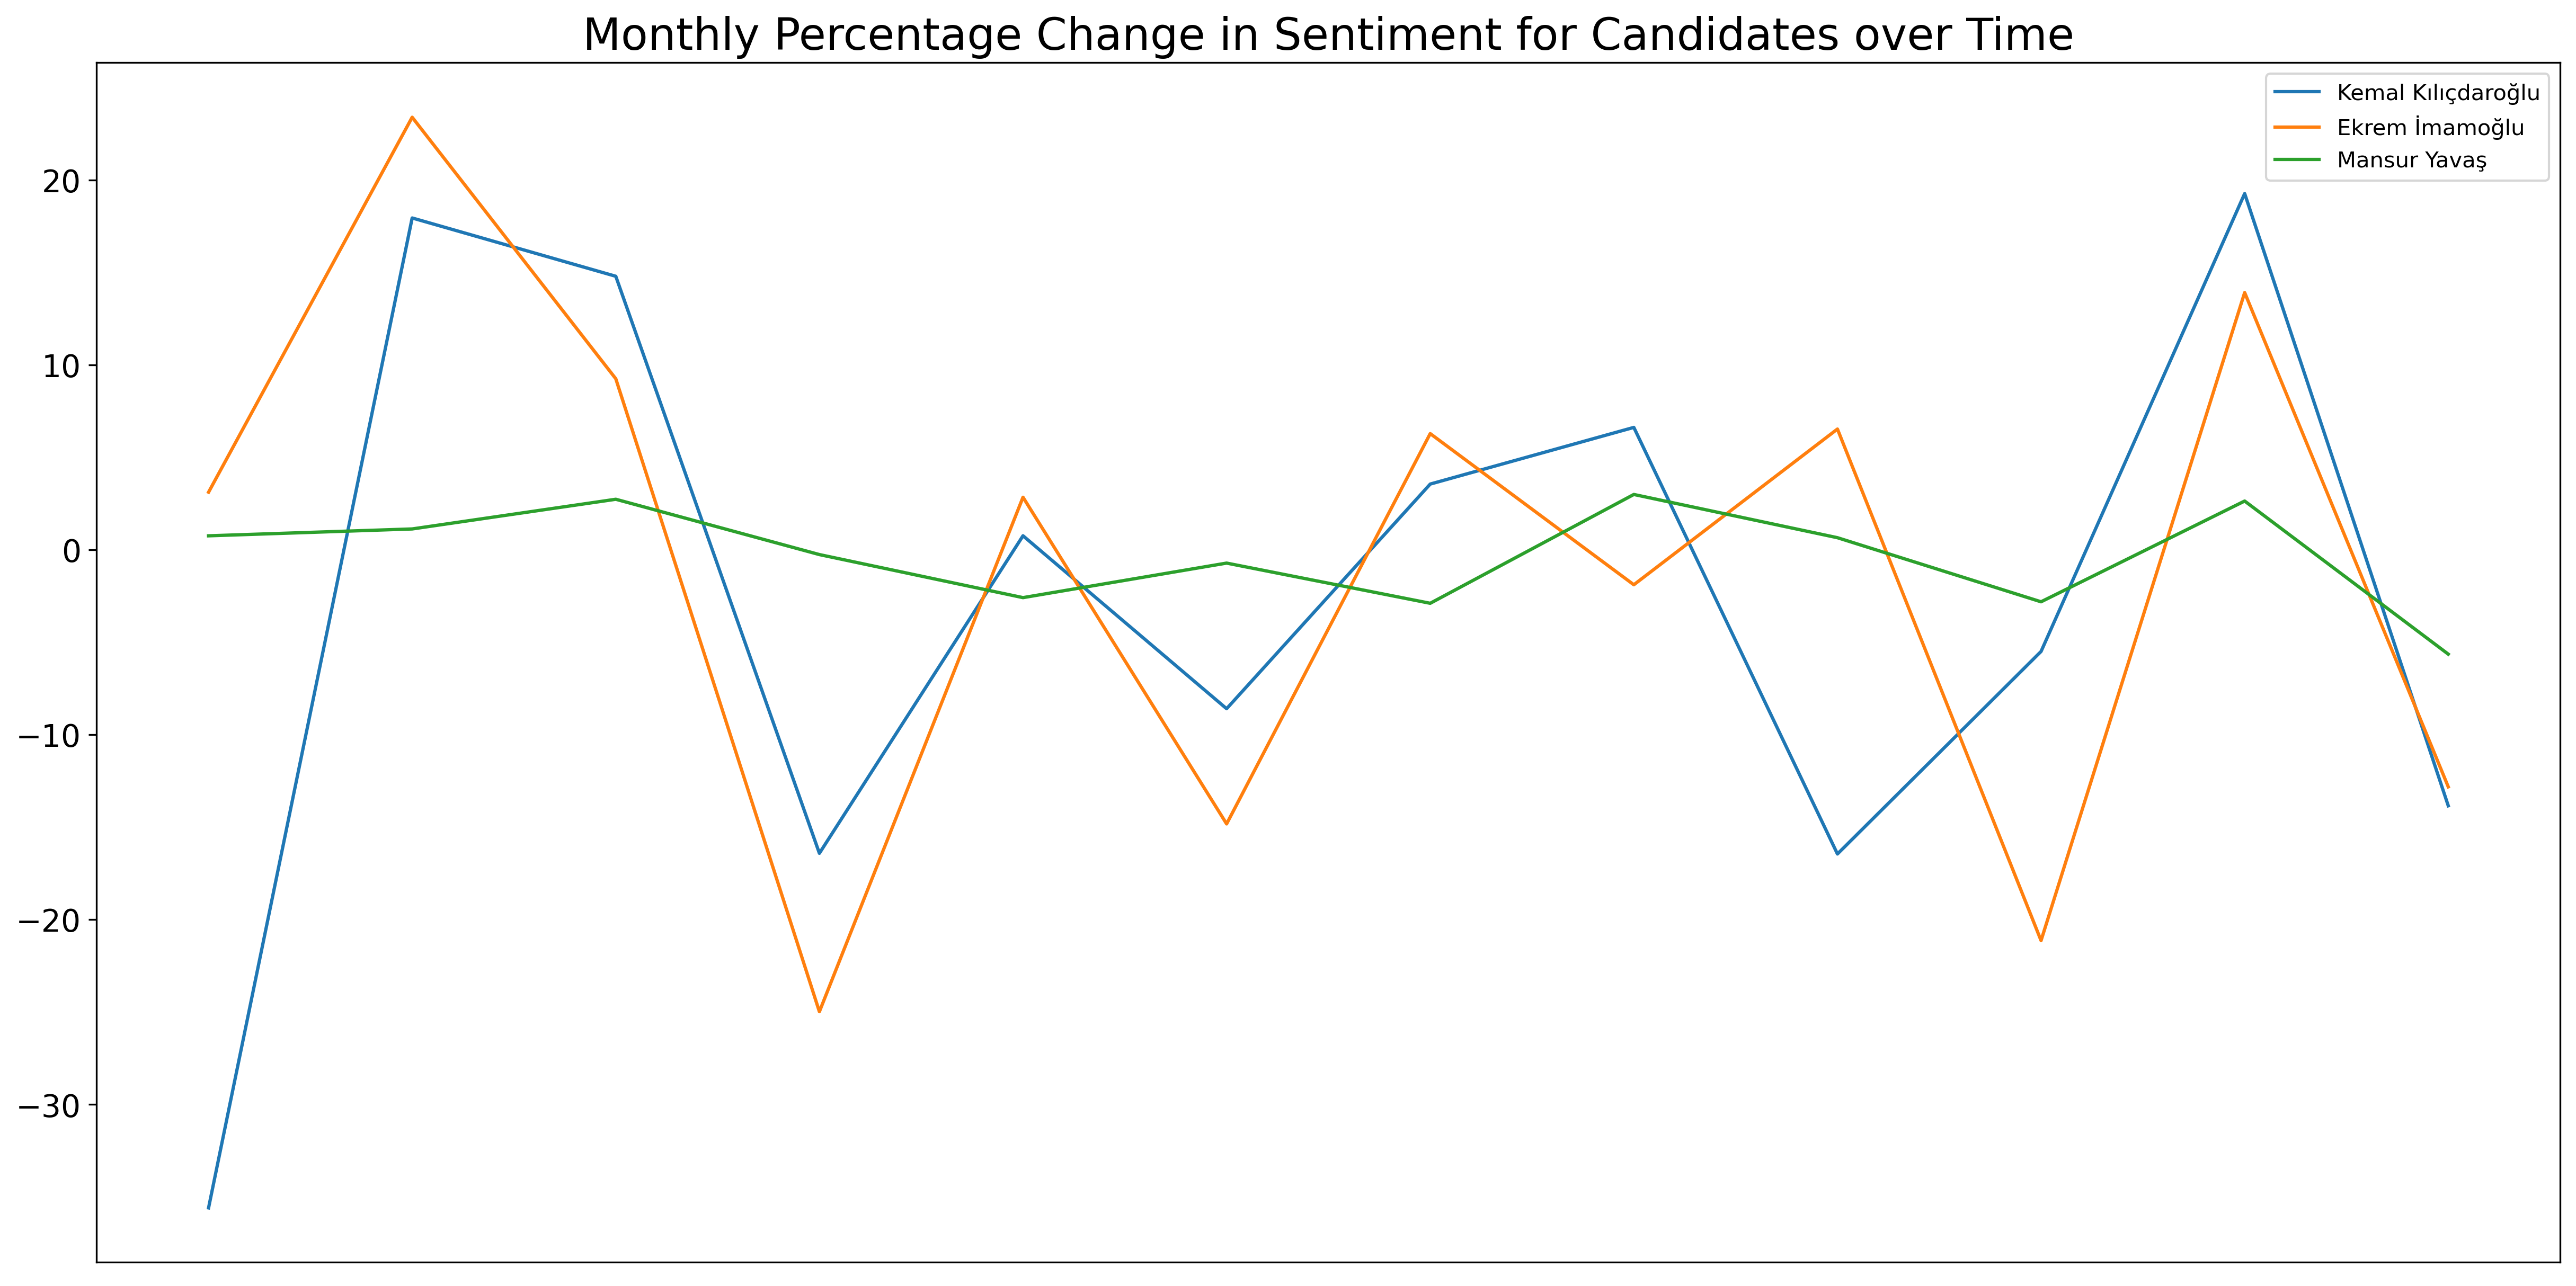

In [28]:
plt.figure(figsize=(20, 10), dpi=300)

plt.plot(kilicdaroglu_sent_monthly.index, kilicdaroglu_sent_monthly["percentage_change"], label="Kemal Kılıçdaroğlu")
plt.plot(imamoglu_sent_monthly.index, imamoglu_sent_monthly["percentage_change"], label="Ekrem İmamoğlu")
plt.plot(mansur_sent_monthly.index, mansur_sent_monthly["percentage_change"], label="Mansur Yavaş")

plt.title("Monthly Percentage Change in Sentiment for Candidates over Time", fontsize=20)
plt.xticks(kilicdaroglu_sent_monthly.index[::15], rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.legend()
plt.show()

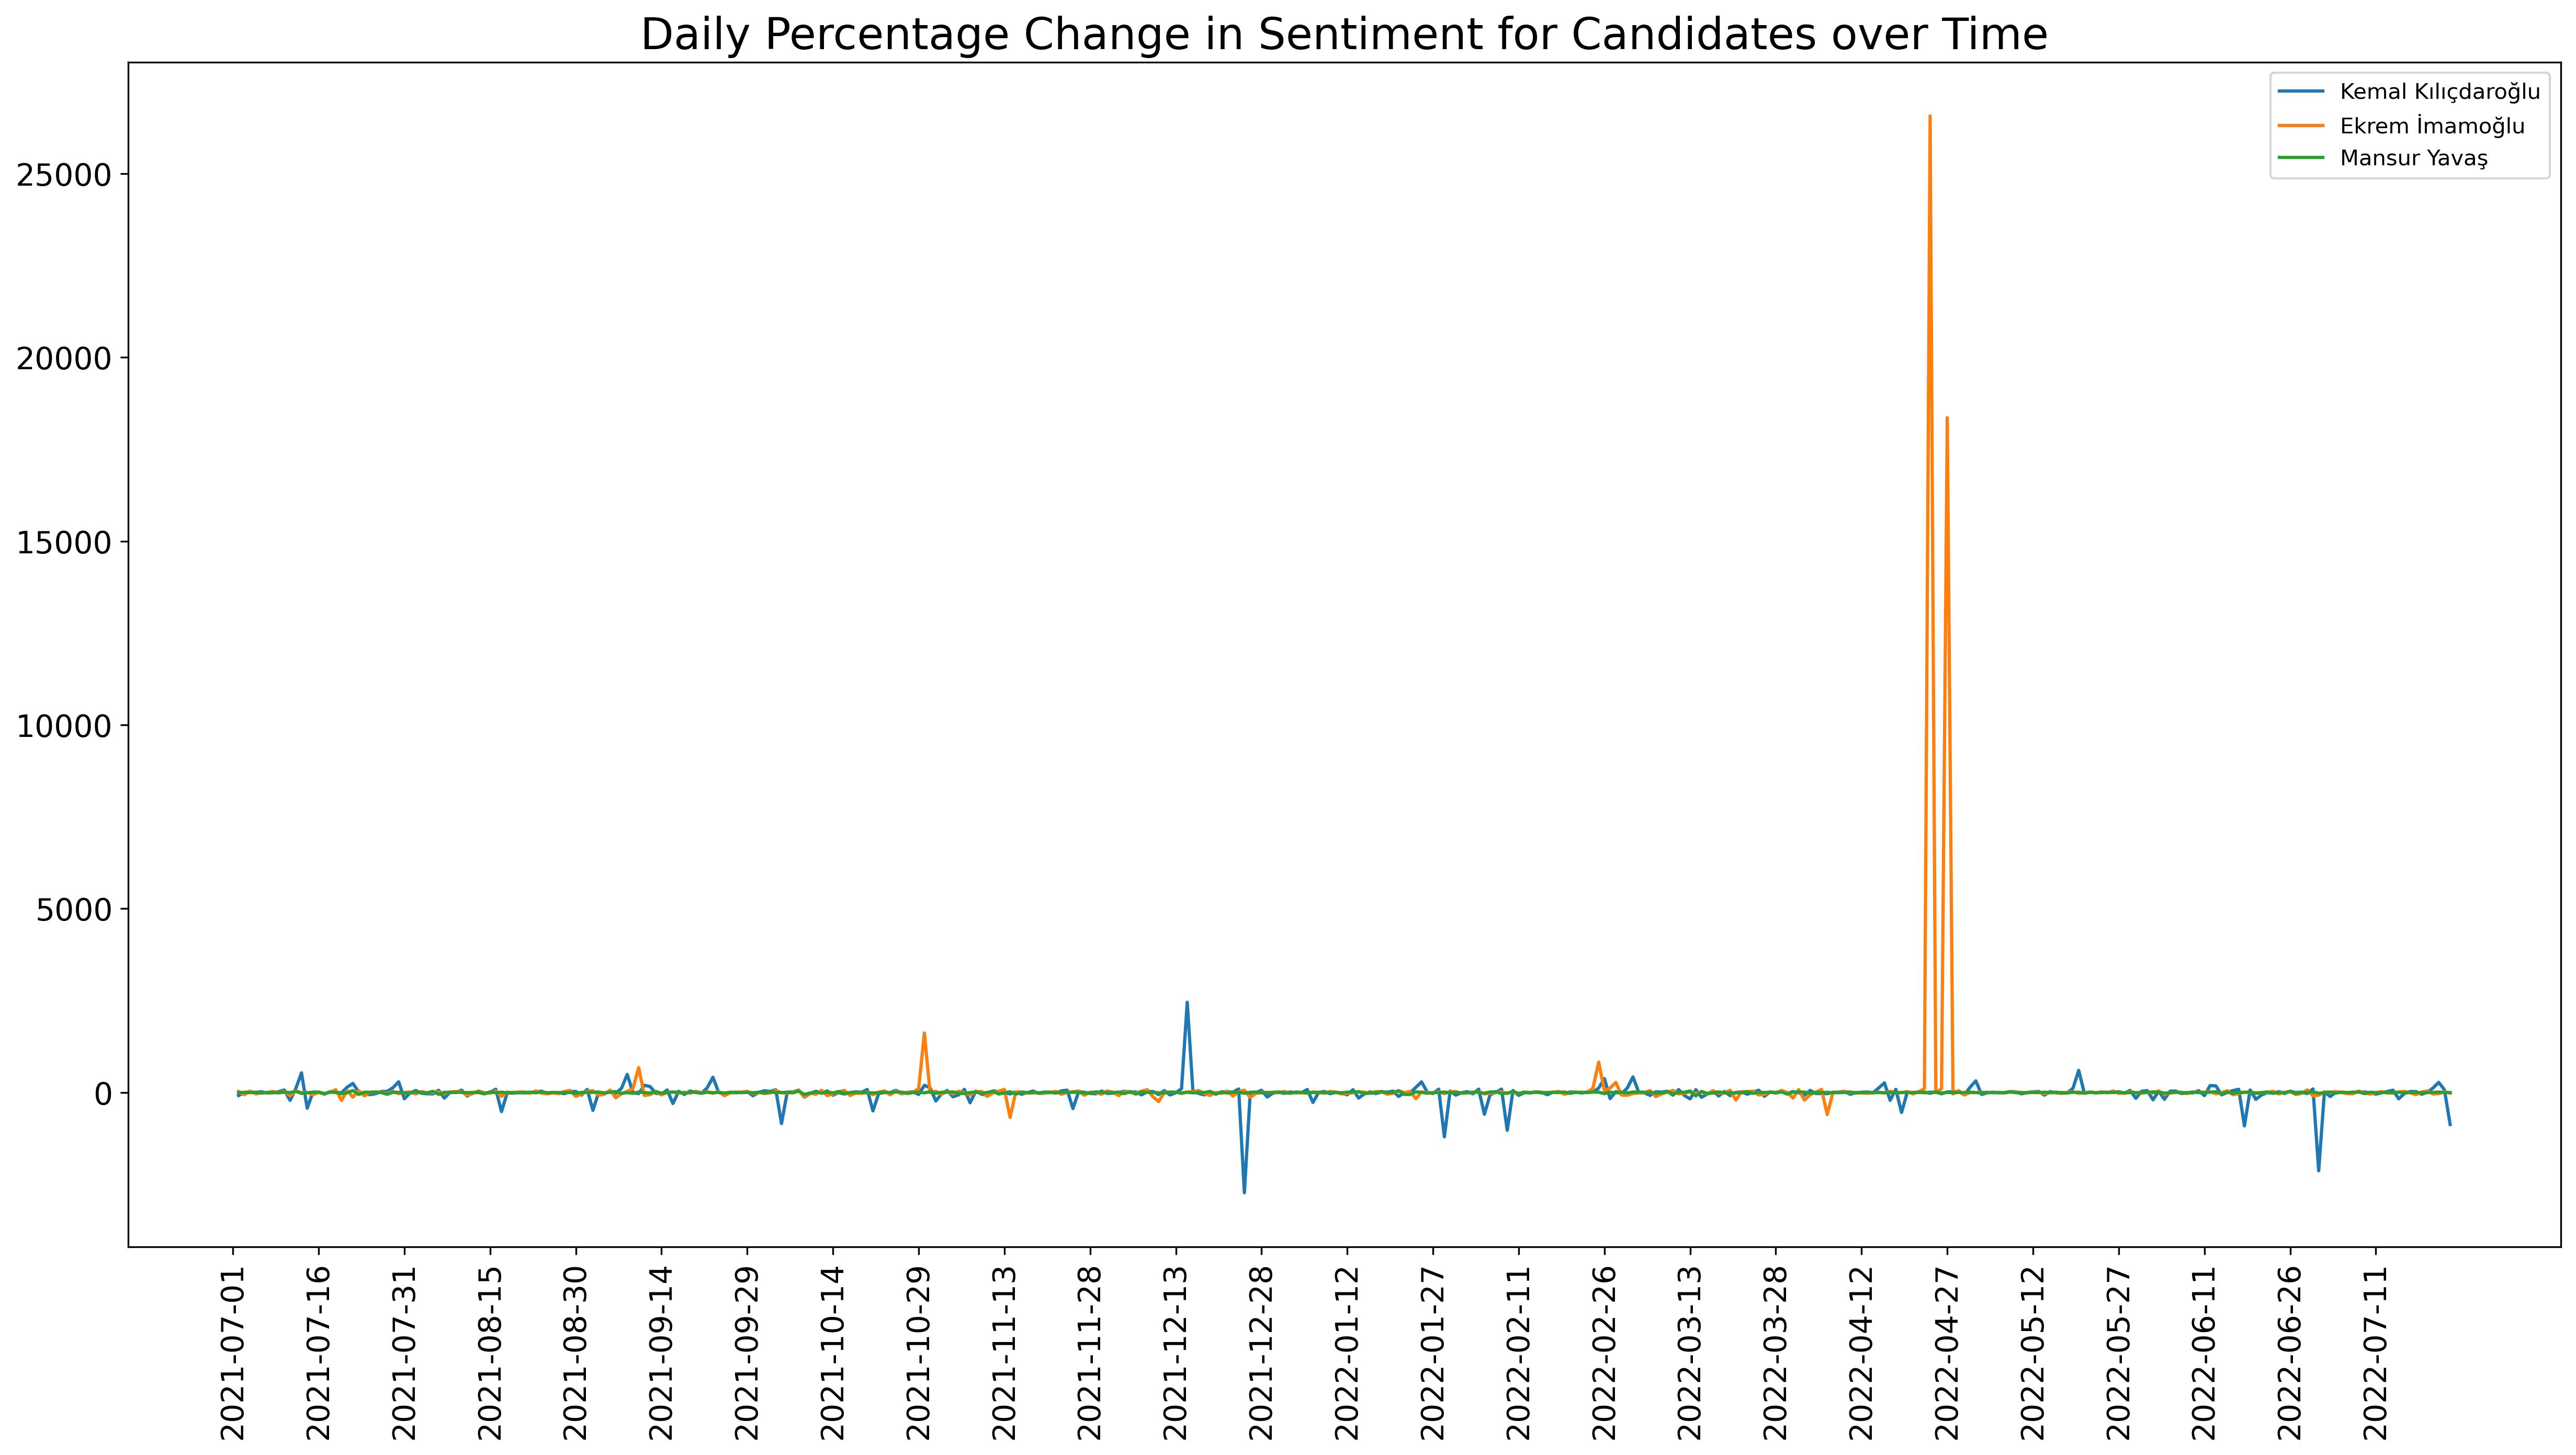

In [29]:
plt.figure(figsize=(20, 10), dpi=300)

plt.plot(kilicdaroglu_sent_daily.index, kilicdaroglu_sent_daily["percentage_change"], label="Kemal Kılıçdaroğlu")
plt.plot(imamoglu_sent_daily.index, imamoglu_sent_daily["percentage_change"], label="Ekrem İmamoğlu")
plt.plot(mansur_sent_daily.index, mansur_sent_daily["percentage_change"], label="Mansur Yavaş")

plt.title("Daily Percentage Change in Sentiment for Candidates over Time", fontsize=20)
plt.xticks(kilicdaroglu_sent_daily.index[::15], rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.legend()
plt.show()

In [30]:
# Replacing Outliers with the Mean
imamoglu_sent_daily["percentage_change_modified"] = imamoglu_sent_daily["percentage_change"].apply(lambda x: imamoglu_sent_daily["percentage_change"].mean() if x > 15_000 else x)

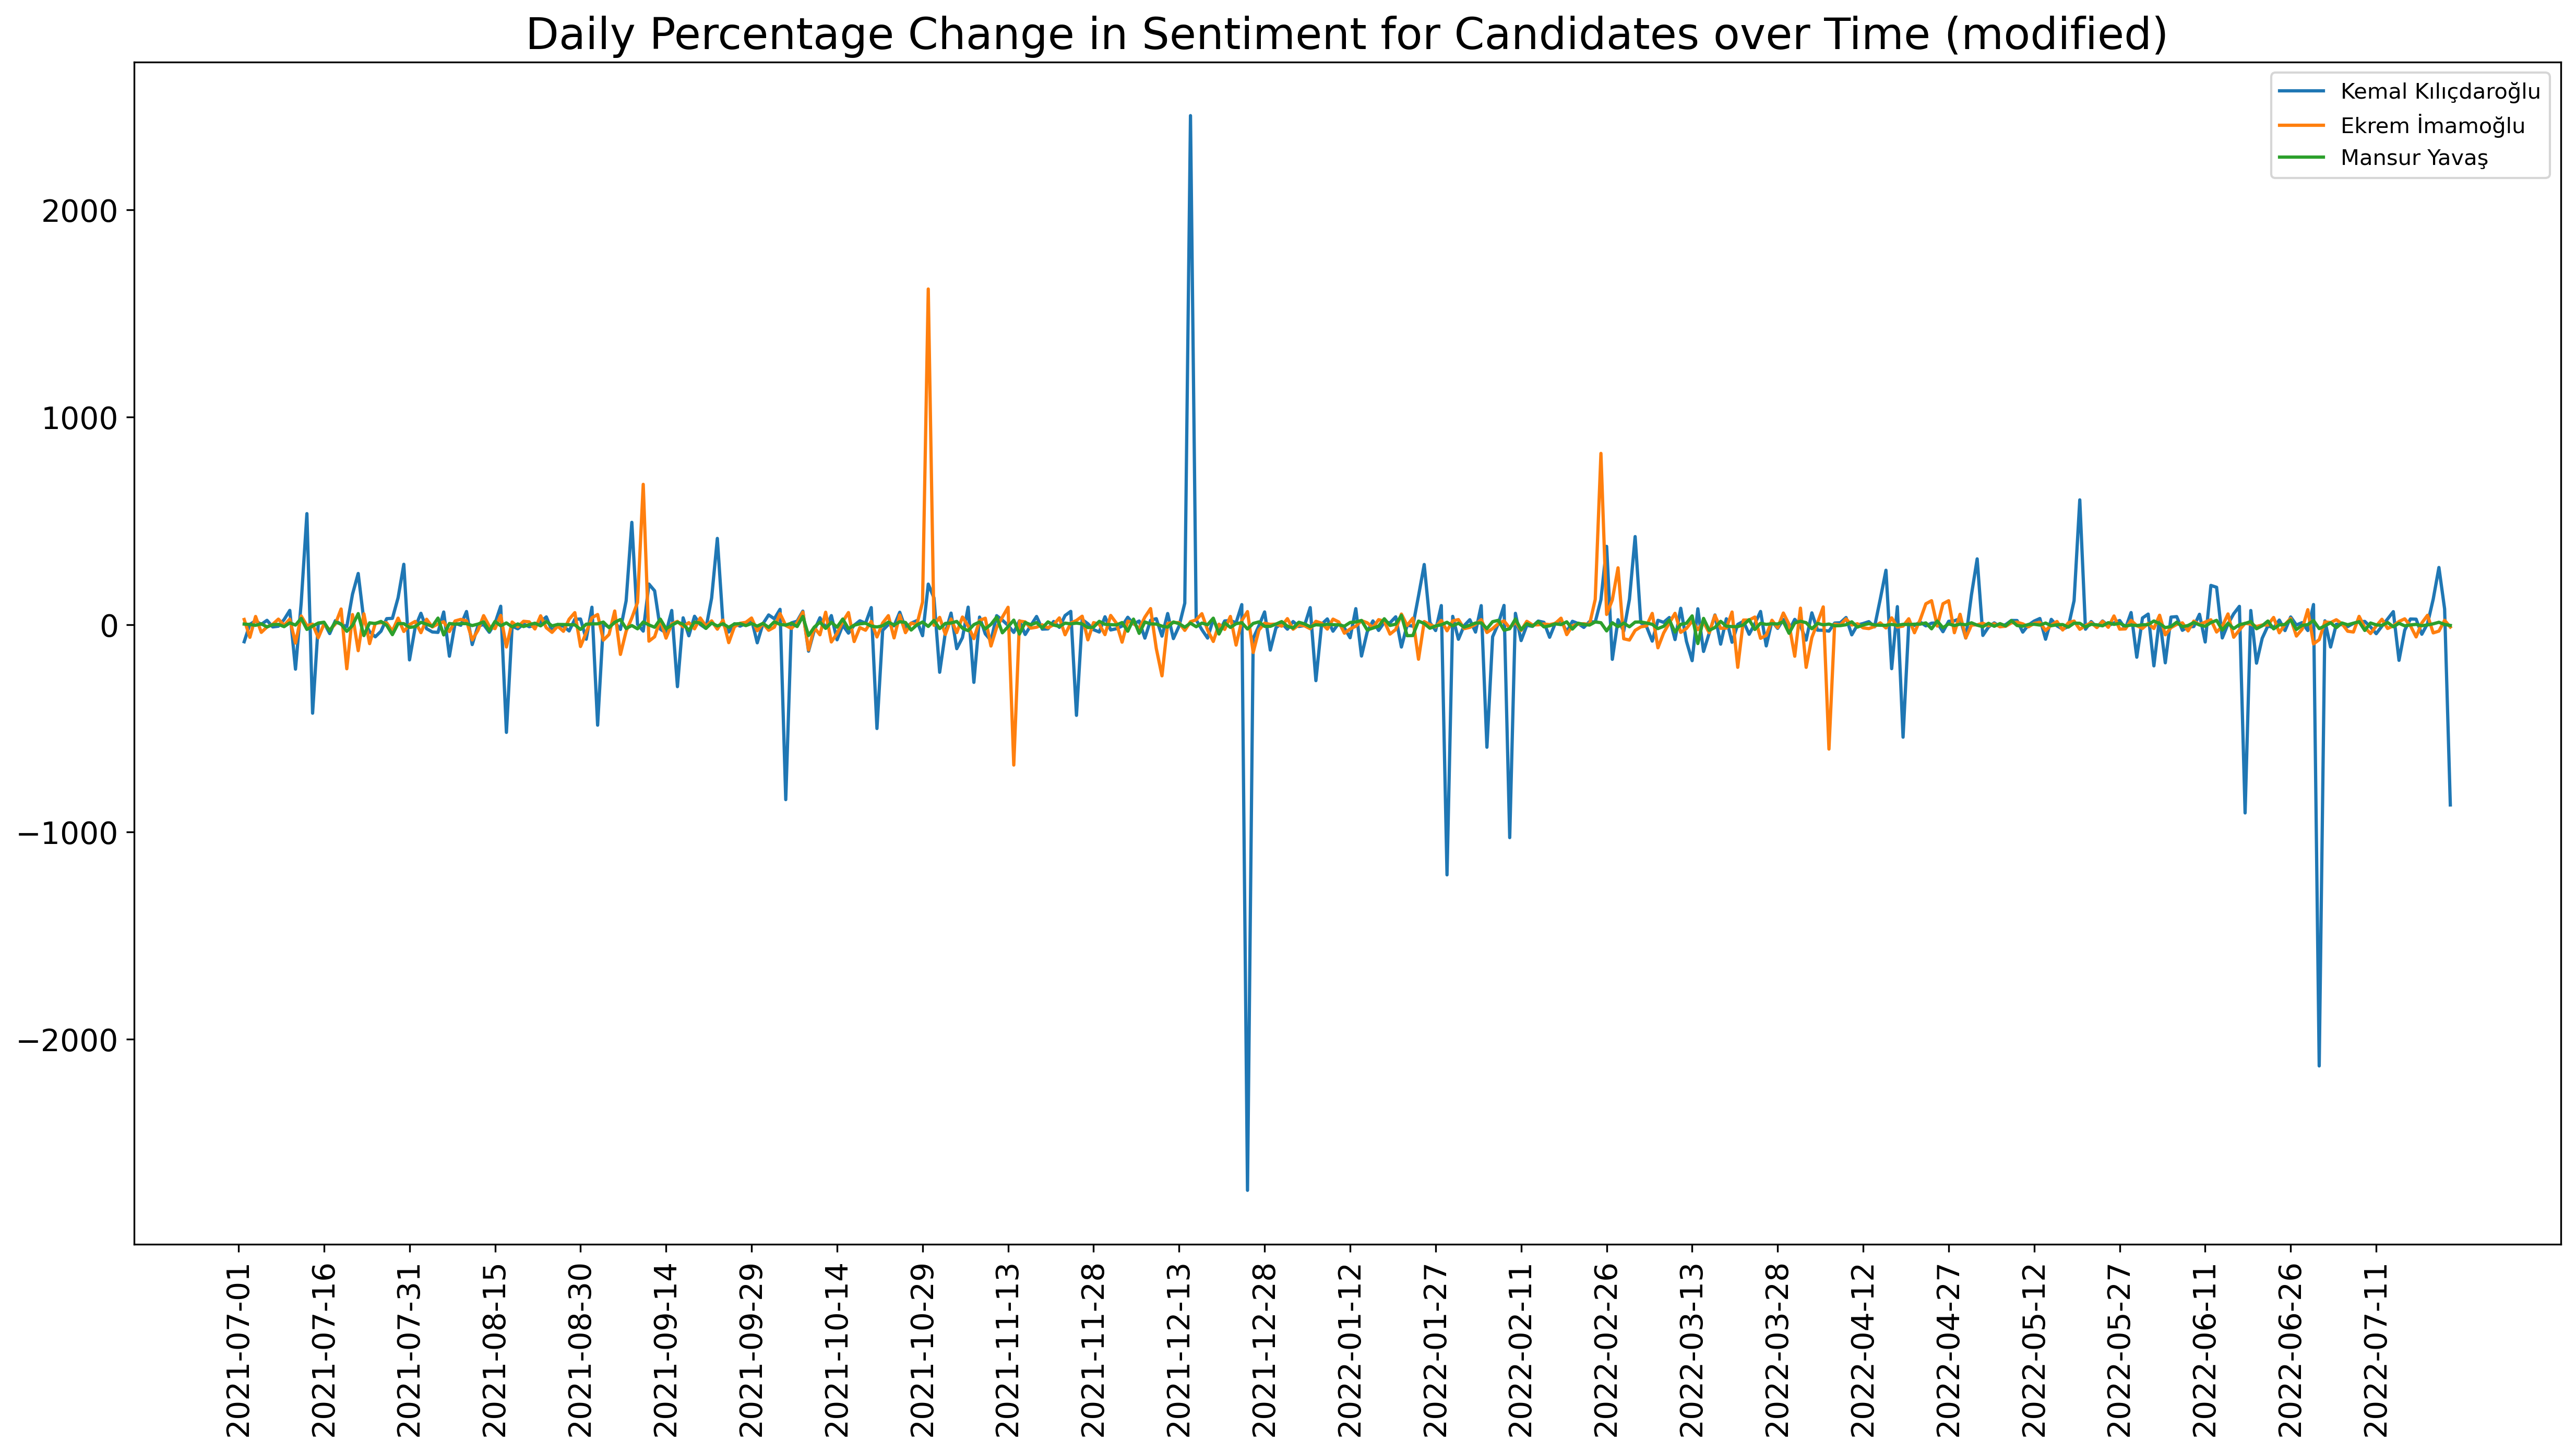

In [31]:
plt.figure(figsize=(20, 10), dpi=300)

plt.plot(kilicdaroglu_sent_daily.index, kilicdaroglu_sent_daily["percentage_change"], label="Kemal Kılıçdaroğlu")
plt.plot(imamoglu_sent_daily.index, imamoglu_sent_daily["percentage_change_modified"], label="Ekrem İmamoğlu")
plt.plot(mansur_sent_daily.index, mansur_sent_daily["percentage_change"], label="Mansur Yavaş")

plt.title("Daily Percentage Change in Sentiment for Candidates over Time (modified)", fontsize=20)
plt.xticks(kilicdaroglu_sent_daily.index[::15], rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.legend()
plt.show()

## Correlation Between Percentage Change in Sentiment Scores of Candidates 

In [32]:
kilicdaroglu_sent_daily_per_change = pd.Series(kilicdaroglu_sent_daily["percentage_change"][1:], name="kilicdar_per_change_daily")
imamoglu_sent_daily_per_change = pd.Series(imamoglu_sent_daily["percentage_change"][1:], name="imamoglu_per_change_daily")
mansur_sent_daily_per_change = pd.Series(mansur_sent_daily["percentage_change"][1:], name="mansur_per_change_daily")

In [33]:
kilicdaroglu_sent_monthly_per_change = pd.Series(kilicdaroglu_sent_monthly["percentage_change"][1:], name="kilicdar_per_change_monthly")
imamoglu_sent_monthly_per_change = pd.Series(imamoglu_sent_monthly["percentage_change"][1:], name="imamoglu_per_change_monthly")
mansur_sent_monthly_per_change = pd.Series(mansur_sent_monthly["percentage_change"][1:], name="mansur_per_change_monthly")

In [34]:
candidates_per_change_daily = pd.concat([kilicdaroglu_sent_daily_per_change, imamoglu_sent_daily_per_change, mansur_sent_daily_per_change], axis=1)
candidates_per_change_monthly = pd.concat([kilicdaroglu_sent_monthly_per_change, imamoglu_sent_monthly_per_change, mansur_sent_monthly_per_change], axis=1)

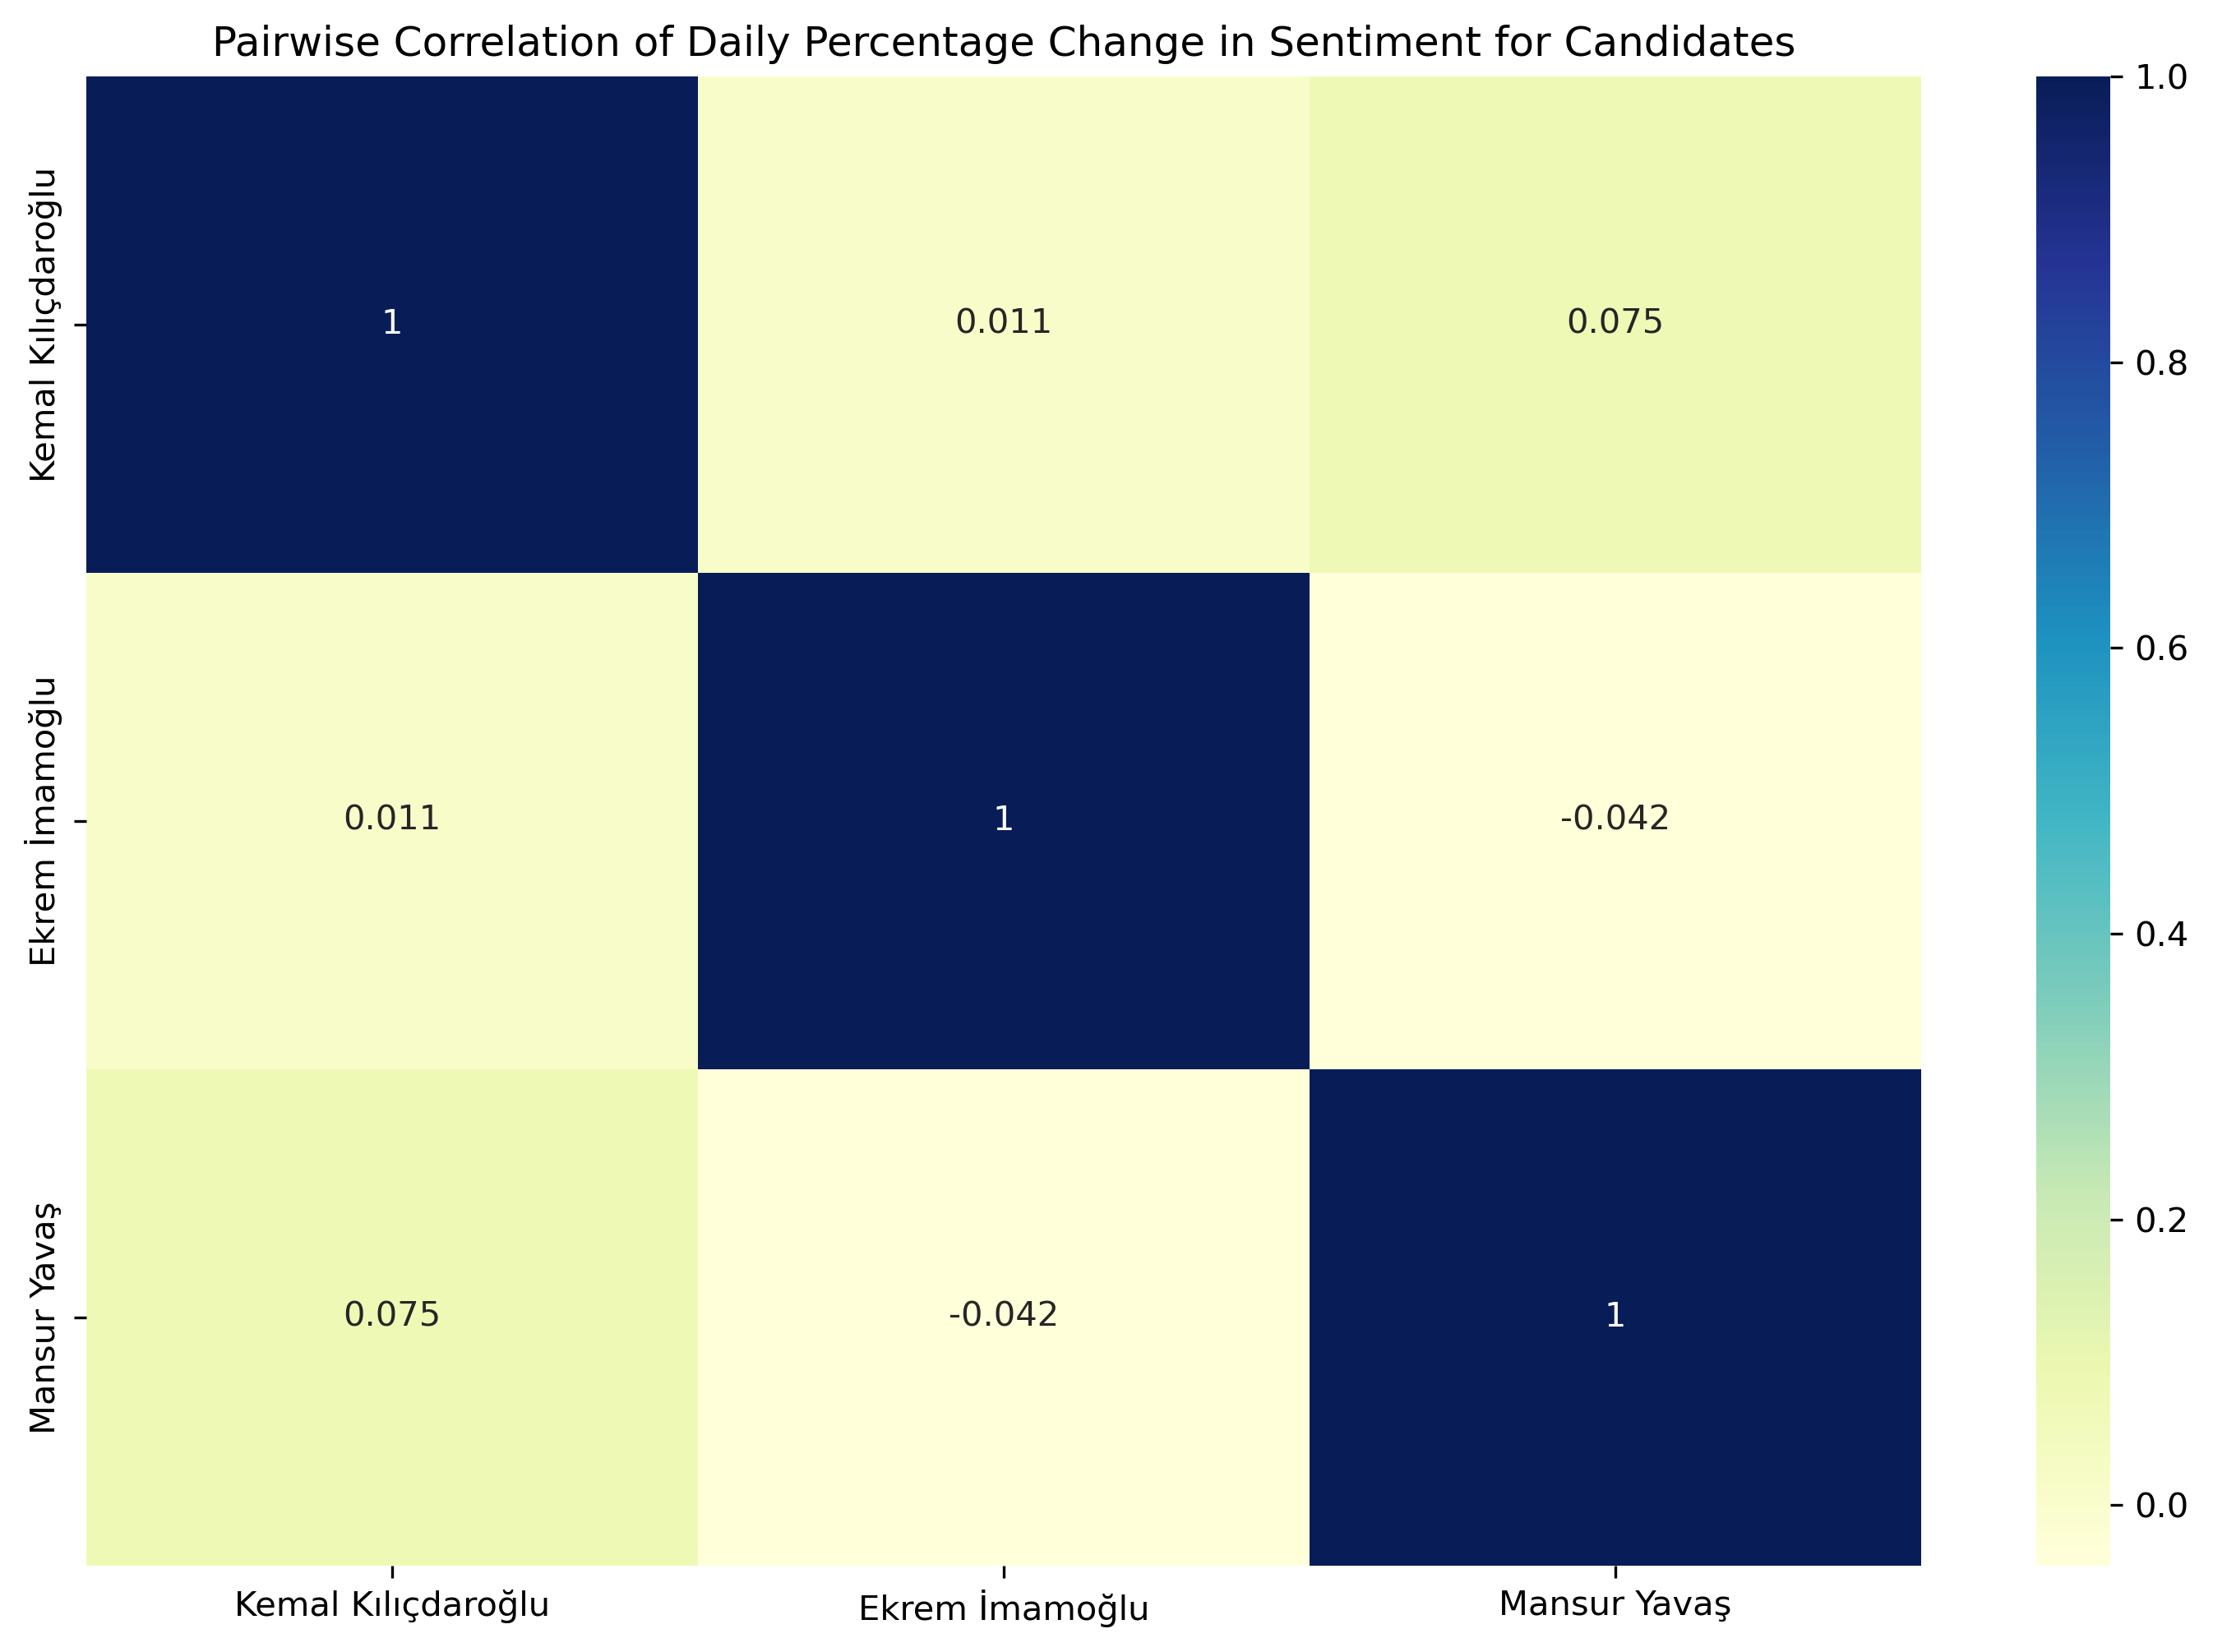

In [35]:
plt.figure(figsize=(12, 8), dpi=300)

plt.title("Pairwise Correlation of Daily Percentage Change in Sentiment for Candidates", fontsize=12)
sns.heatmap(candidates_per_change_daily.corr().rename({"kilicdar_per_change_daily":"Kemal Kılıçdaroğlu", "imamoglu_per_change_daily":"Ekrem İmamoğlu", "mansur_per_change_daily":"Mansur Yavaş"}).rename({"kilicdar_per_change_daily":"Kemal Kılıçdaroğlu", "imamoglu_per_change_daily":"Ekrem İmamoğlu", "mansur_per_change_daily":"Mansur Yavaş"}, axis=1), cmap="YlGnBu", annot=True, )
plt.show()

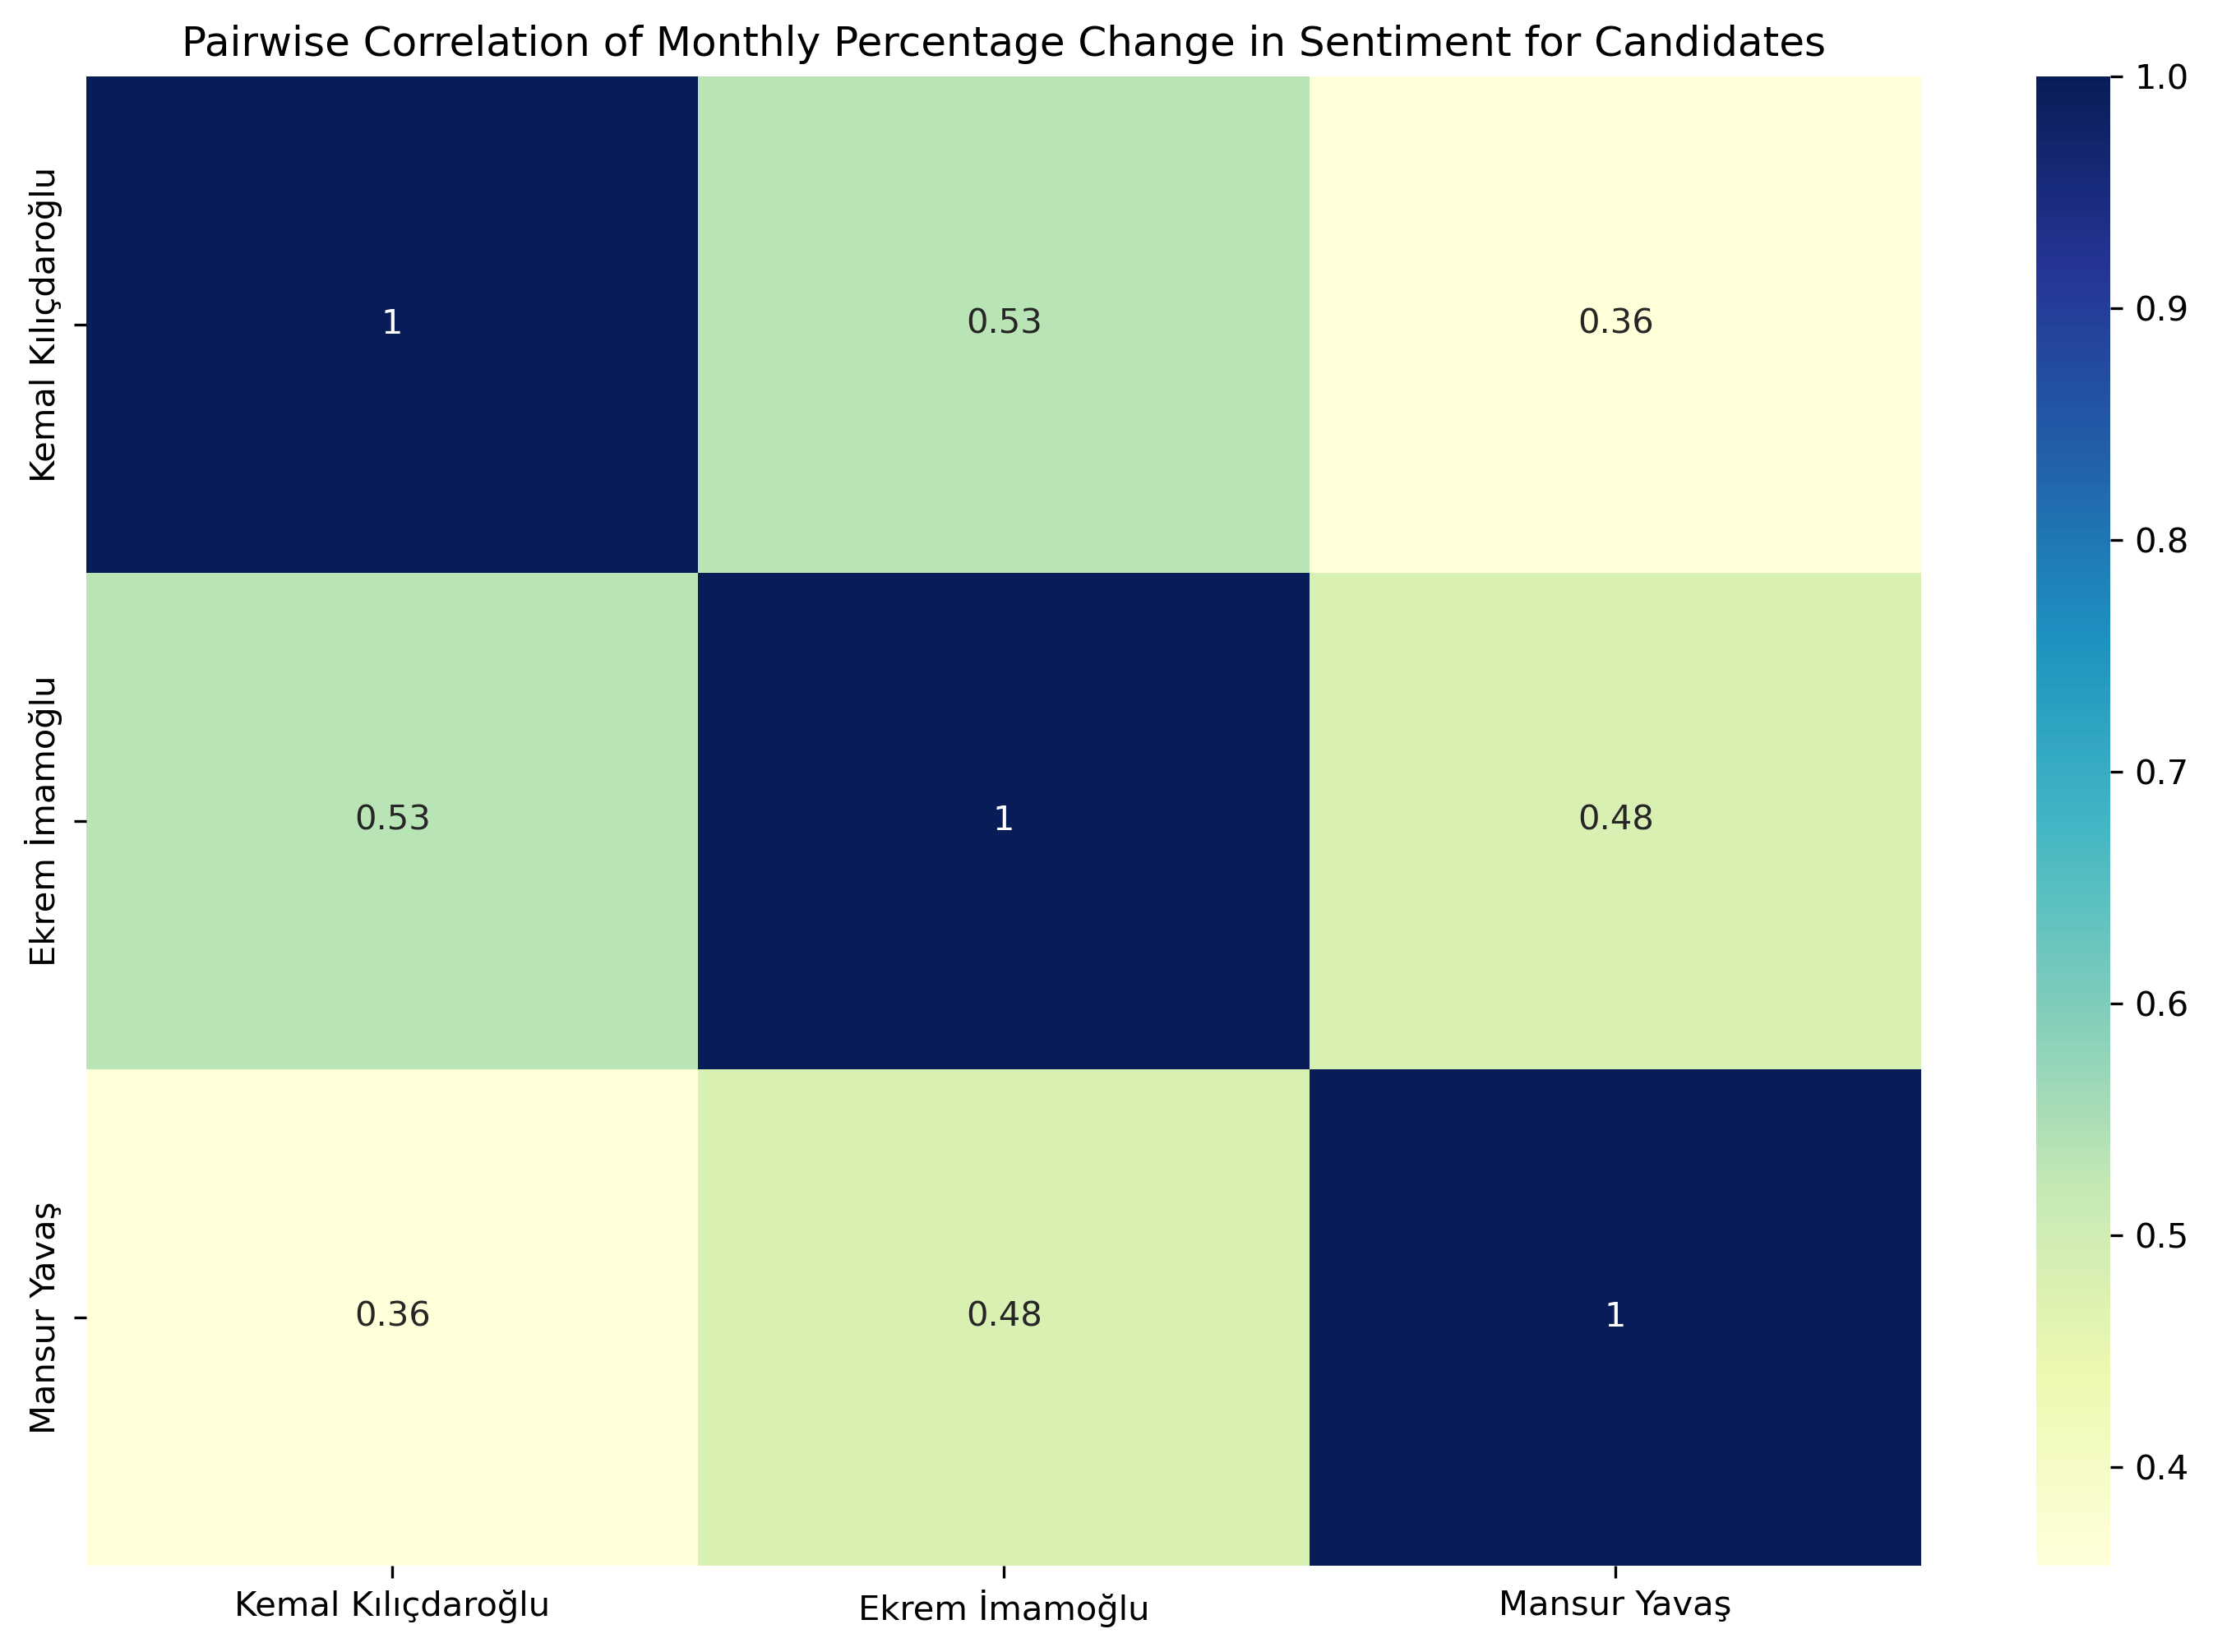

In [36]:
plt.figure(figsize=(12, 8), dpi=300)

plt.title("Pairwise Correlation of Monthly Percentage Change in Sentiment for Candidates", fontsize=12)
sns.heatmap(candidates_per_change_monthly.corr().rename({"kilicdar_per_change_monthly":"Kemal Kılıçdaroğlu", "imamoglu_per_change_monthly":"Ekrem İmamoğlu", "mansur_per_change_monthly":"Mansur Yavaş"}).rename({"kilicdar_per_change_monthly":"Kemal Kılıçdaroğlu", "imamoglu_per_change_monthly":"Ekrem İmamoğlu", "mansur_per_change_monthly":"Mansur Yavaş"}, axis=1), cmap="YlGnBu", annot=True)
plt.show()